In [722]:
# 데이터의 특징 파악할 수 있어야 됨!!
# cat boost

import package&class

In [723]:
# 분석
import pandas as pd
import numpy as np

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌



In [724]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score



# 주피터 창 늘리기
# from IPython.core.display import display, HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))

# 판다스 데이터 프레임 속성
# from IPython.core.display import display, HTML
#    display(HTML(\"<style>.container{width:100% !important;}</style>
#    pd.set_option('display.max_rows', 100)
#    pd.set_option('display.max_columns', 100)
#    pd.set_option('max_colwidth', None)
#    sns.set()



**** 모델 분석+점수 내기 함수로 만들기 <- ++ feature_importances_ 확인하는 기능 넣기
fit한 것 이름.feature_importances_ 하면 어레이로 출력됨(RandomForestClassifier 모델이 분석할 때 어떤 변수를 중요하게 보고 가지 쳤는지가 나온다.)

In [725]:


def my_fit_score(train, target="credit"):
    model_list = [RandomForestClassifier(n_estimators=100, random_state=1234) ,
              LogisticRegression(penalty="l2", random_state=1234),
              #KNeighborsClassifier(),
              #DecisionTreeClassifier(),
              #LinearSVC()
             ]
    
    y = train[target]
    X = train.drop([target], axis=1)

    X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=1234,
                                                   shuffle=True
                                                   )
   
    for model in model_list:
        model.fit(X_train, y_train)  #---학습해라
        내답안지 = model.predict(X_test)
        acc_score = accuracy_score(y_test, 내답안지)
        print(f"{model.__class__.__name__} \t\t 정확도:{acc_score:.4f}")
        #  print(model.feature_importances_) # 어레이로 출력됨. => 모델이 어떤 변수를 중요하게 봤나
        # -------------------------피쳐 중요도
        # plt.rc('font', family='Malgun Gothic')
        # plt.xticks(rotation=90) # 90도로 돌림
        # plt.bar(X.columns, model.feature_importances_)

        
        
        


In [726]:
sns.set(rc={'figure.figsize':(18, 5)})
my_fit_score(crd)

# -> 피쳐 중요도 높은 것부터 처리하자!!!!

RandomForestClassifier 		 정확도:0.7077
LogisticRegression 		 정확도:0.6398


c:\ai\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['credit', 'occyp_type_Medicine staff', 'occyp_type_Security staff',
       'email', 'edu_type'],
      dtype='object')


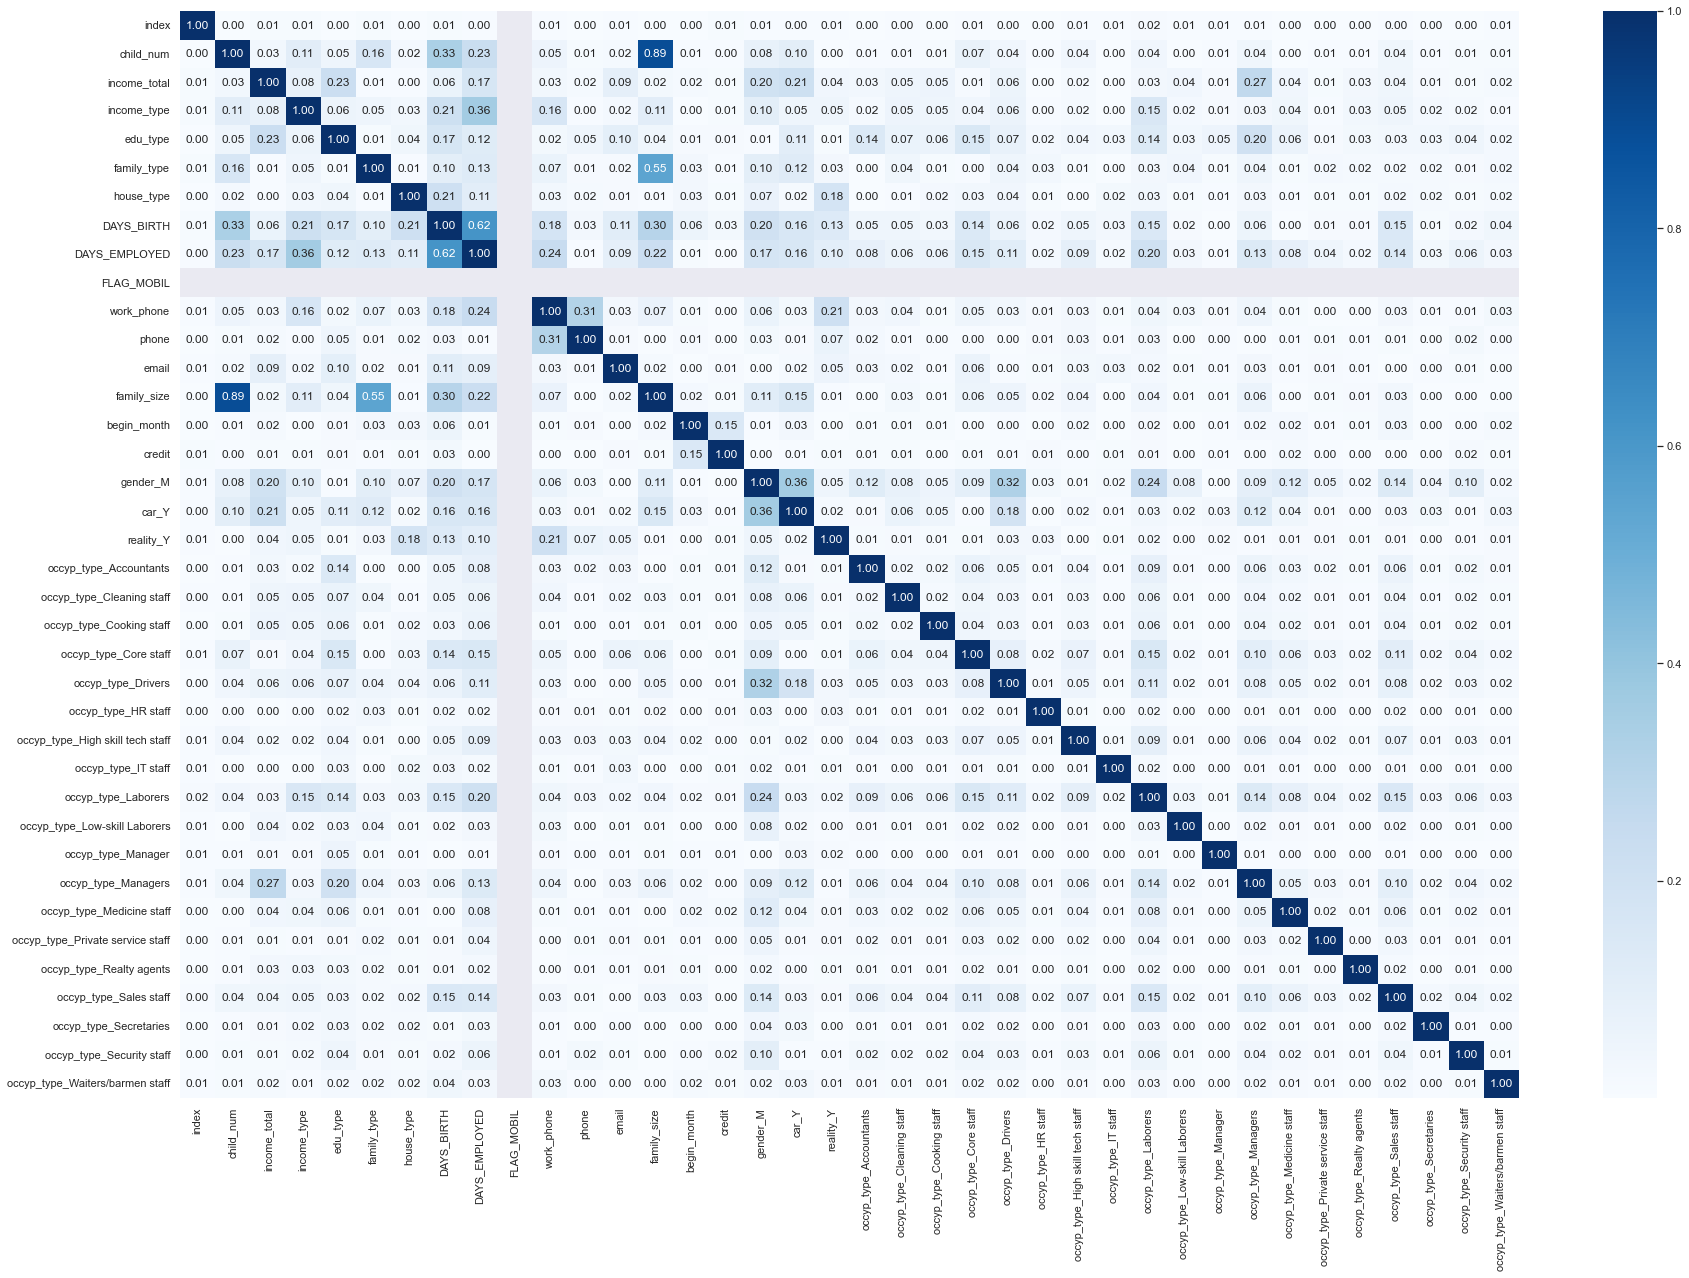

In [727]:
sns.set(rc={'figure.figsize':(30, 20)})
# sns.heatmap(crd.corr(), cmap='Blues' , annot=True, fmt=".2f")
sns.heatmap(abs(crd.corr()), cmap='Blues' , annot=True, fmt=".2f") # 우왕 그냥 해봤는데 이러면 절대값으로 씌워져서 더 알아보기 쉽다

#nlargest, nsmallest (최대값 몇 개, 최소값 몇 개까지 볼 수 있다.)
# sns.heatmap(crd.corr().nlargest(5, 뭔가있다.), cmap='Blues' , annot=True, fmt=".2f")

print(crd.corr().nlargest(5,'credit').index)

# 데이터 개요, 사전세팅

## 데이터 개요

In [728]:
crd=pd.read_csv('./dataset/train.csv', sep=',')

In [729]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  int64  
 18  begin_

### TO-DO: 1. 결측 컬럼(occyp_type), 2. object 컬럼 3. 서로 연관되어 보이는 columns 하나로 합치기

In [730]:
crd.shape

(26457, 20)

In [731]:
crd.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


## lower

In [732]:
crd.columns

lower_col=[col.lower() for col in crd.columns]
lower_col

crd.columns=lower_col
crd.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


## 차트 크기 설정

In [733]:
sns.set(rc={'figure.figsize':(18, 5)})

## days_birth, days_employed, begin_month 조정
-> 이건 데이터 가공으로 들어가도 될듯?

### days_birth

In [734]:
crd['days_birth'].describe()

count    26457.000000
mean    -15958.053899
std       4201.589022
min     -25152.000000
25%     -19431.000000
50%     -15547.000000
75%     -12446.000000
max      -7705.000000
Name: days_birth, dtype: float64

In [735]:
# crd['years_birth'] -> 만 나이

crd['years_birth']=crd['days_birth']*(-1)/365
crd['years_birth'].astype('int')

0        38
1        31
2        52
3        41
4        41
         ..
26452    33
26453    41
26454    27
26455    27
26456    53
Name: years_birth, Length: 26457, dtype: int32

In [736]:
crd['years_birth'].describe()

count    26457.000000
mean        43.720696
std         11.511203
min         21.109589
25%         34.098630
50%         42.594521
75%         53.235616
max         68.909589
Name: years_birth, dtype: float64

### days_employed -> 이상치 발견하여 제거

In [737]:
crd['days_employed'].describe()

count     26457.000000
mean      59068.750728
std      137475.427503
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: days_employed, dtype: float64

In [738]:
# crd['years_employed'] -> 근무한 년도 , 음수일 경우 실직 기간
crd['years_employed']=crd['days_employed']*(-1)/365
crd['years_employed'].astype('int')

0        12
1         4
2        12
3         5
4         5
         ..
26452     5
26453     6
26454     5
26455     0
26456     2
Name: years_employed, Length: 26457, dtype: int32

In [739]:
crd['years_employed'].describe() # min이 1000년이라 말이 안 됨.

count    26457.000000
mean      -161.832194
std        376.645007
min      -1000.665753
25%          1.115068
50%          4.216438
75%          8.638356
max         43.049315
Name: years_employed, dtype: float64

In [740]:
crd['years_employed'].sort_values(ascending=True).head()

23116   -1000.665753
16571   -1000.665753
16574   -1000.665753
16578   -1000.665753
11117   -1000.665753
Name: years_employed, dtype: float64

(array([ 4438.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22019.]),
 array([-1000.66575342,  -896.29424658,  -791.92273973,  -687.55123288,
         -583.17972603,  -478.80821918,  -374.43671233,  -270.06520548,
         -165.69369863,   -61.32219178,    43.04931507]),
 <BarContainer object of 10 artists>)

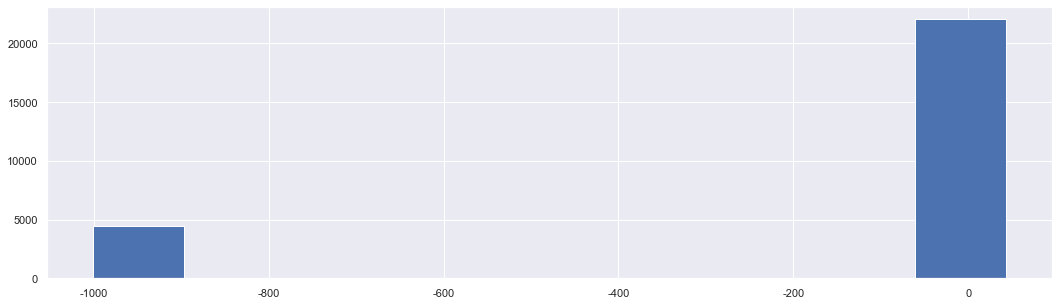

In [741]:
plt.hist(crd['years_employed'])

In [742]:
crd['years_employed'].value_counts()

-1000.665753    4438
 1.098630         57
 4.216438         47
 0.547945         45
 5.717808         44
                ... 
 28.698630         1
 6.032877          1
 6.991781          1
 1.863014          1
 13.624658         1
Name: years_employed, Length: 3470, dtype: int64

<AxesSubplot:>

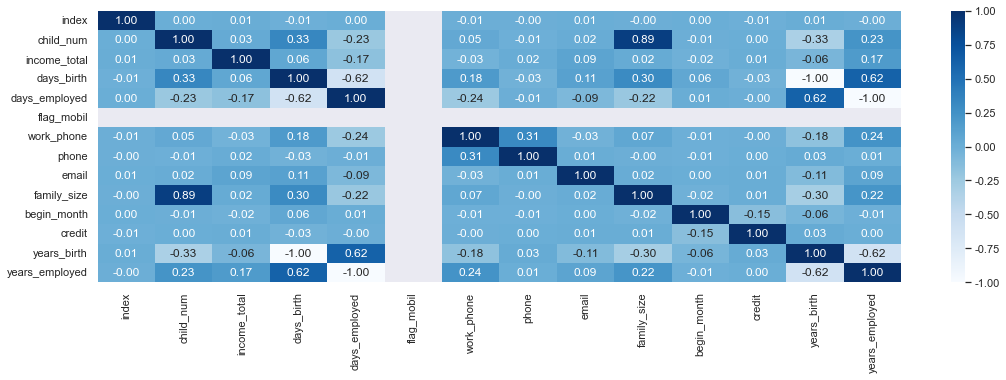

In [743]:
# years_employed와 income_total 관련 있나? -> 별로
sns.heatmap(crd.corr(),cmap="Blues" ,annot=True, fmt=".2f")

In [744]:
# 이상치 0으로 처리
crd.loc[crd['years_employed']<0,'years_employed']=0

(array([13425.,  6381.,  3323.,  1538.,   827.,   478.,   272.,   120.,
           48.,    45.]),
 array([ 0.        ,  4.30493151,  8.60986301, 12.91479452, 17.21972603,
        21.52465753, 25.82958904, 30.13452055, 34.43945205, 38.74438356,
        43.04931507]),
 <BarContainer object of 10 artists>)

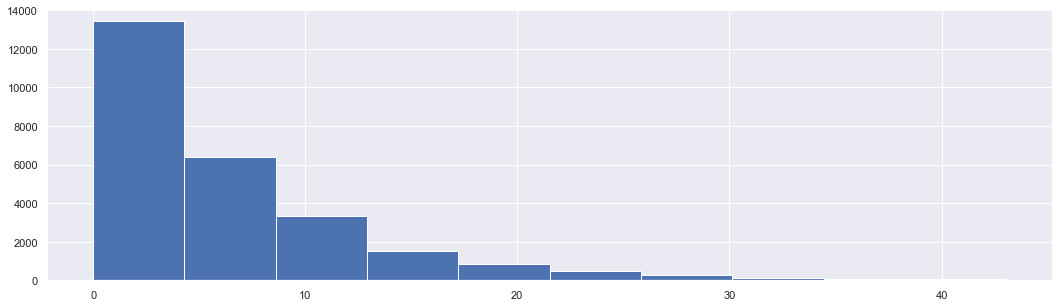

In [745]:
plt.hist(crd['years_employed'])

<AxesSubplot:>

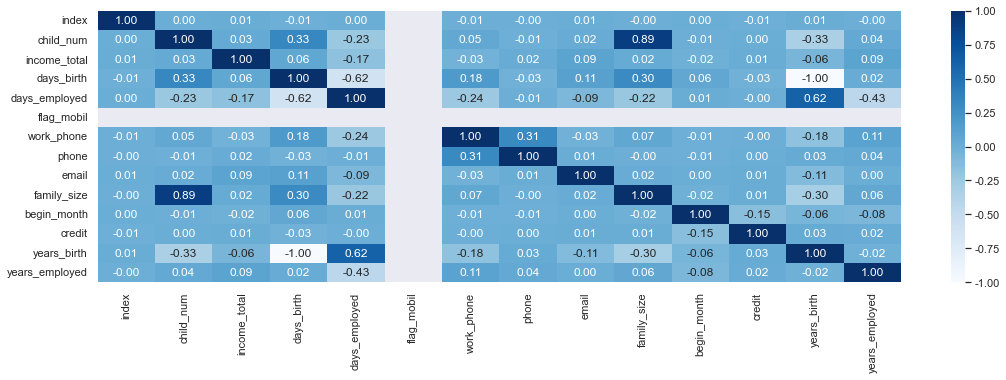

In [746]:
# years_employed와 income_total 관련 있나? -> 별로
sns.heatmap(crd.corr(),cmap="Blues" ,annot=True, fmt=".2f")

### begin_month

In [747]:
crd['begin_month'].describe()

crd['begin_years']=crd['begin_month']*(-1)/12

In [748]:
crd['begin_years'].describe()

count    26457.000000
mean         2.176941
std          1.379962
min          0.000000
25%          1.000000
50%          2.000000
75%          3.250000
max          5.000000
Name: begin_years, dtype: float64

# EDA
-> object numeric outlier

## target data : 'credit'

### credit 데이터가 지나치게 치우치지 않음

0    1
1    1
2    2
3    0
4    2
Name: credit, dtype: int64


<AxesSubplot:>

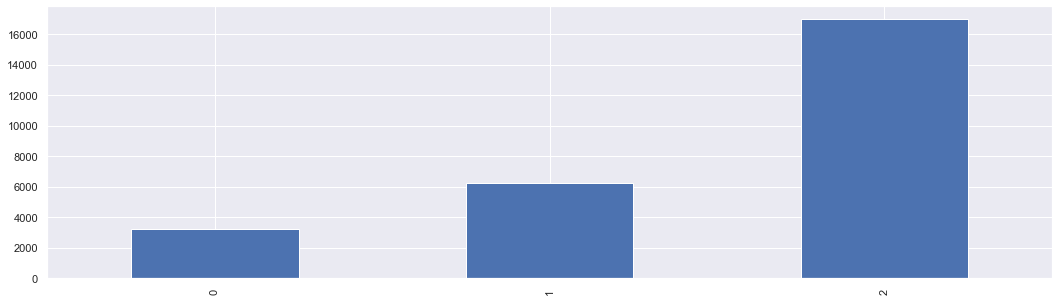

In [749]:
print(crd['credit'].head())
crd['credit'].value_counts().sort_index().plot(kind='bar')

## etc.

In [750]:
crd.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'days_birth',
       'days_employed', 'flag_mobil', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'years_birth',
       'years_employed', 'begin_years'],
      dtype='object')

In [751]:
# unique columns 확인
# ***************************생일 비슷한 사람 왜이리 많은지 의심했어야.......
print('행 개수: \t',crd.shape[0]) # 총 데이터 개수 확인
crd.nunique()

행 개수: 	 26457


index             26457
gender                2
car                   2
reality               2
child_num             9
income_total        249
income_type           5
edu_type              5
family_type           5
house_type            6
days_birth         6621
days_employed      3470
flag_mobil            1
work_phone            2
phone                 2
email                 2
occyp_type           18
family_size          10
begin_month          61
credit                3
years_birth        6621
years_employed     3470
begin_years          61
dtype: int64

### TO-DO: 1. flag_mobil drop, 2. object 컬럼 dummy/cate화
-> flag_mobil은 단일값만을 가져 데이터로서 의미 없음(drop)
-> 2개 값만을 가지는 데이터는 dummy변수화

In [752]:
# unique value 확인

# unique 데이터가 많은 컬럼은 drop한 임시 df 생성
temp=crd.drop(['index', 'income_total', 'days_birth', 'days_employed', 'begin_month'], axis=1)

for uni_col in temp.columns:
    print(uni_col)
    print(pd.unique(temp[uni_col]))
    print('--'*30)

# temp 데이터프레임 drop
del(temp)

gender
['F' 'M']
------------------------------------------------------------
car
['N' 'Y']
------------------------------------------------------------
reality
['N' 'Y']
------------------------------------------------------------
child_num
[ 0  1  2  3  4  5 14 19  7]
------------------------------------------------------------
income_type
['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
------------------------------------------------------------
edu_type
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
------------------------------------------------------------
family_type
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
------------------------------------------------------------
house_type
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
------------------------------------------------------------
flag_mobi

# 결측 데이터 처리
결측 많으면 예상치 넣느니 버리기도(근데 중요한 건 버리면 안 됨. 데이터 따라 다르다!!!!, 도메인 지식이 중요)

## occyp_type 결측 처리
--> 강사님 것 참고

In [753]:
pd.crosstab(crd['occyp_type'], crd['credit'])

credit,0,1,2
occyp_type,,,
Accountants,118,227,557
Cleaning staff,40,93,270
Cooking staff,58,110,289
Core staff,347,622,1677
Drivers,187,358,1030
HR staff,7,4,51
High skill tech staff,123,270,647
IT staff,8,10,23
Laborers,586,1082,2844


<pre>
---------------> 일부 의미 있는 데이터들이 보이기 때문에 occyp_type을 drop하는 것은 부적합  
---------------> 다른 데이터들과 관련 있는지 확인
---------------> 직업 유형과 관련 있을 데이터 후보
(업무 방식별)
work_phone: 업무용 전화 소유 여부
email: 이메일 소유 여부

(직업 요건별)
edu_type: 교육 수준

(직업 유형에 따른 결과)
house_type: 생활 방식
income_total: 연간 소득
income_type: 소득 분류
car: 차량 소유 여부
reality: 부동산 소유 여부

In [754]:
# occyp_type가 null 값을 갖는 데이터프레임을 생성하고 해당 데이터프레임의 컬럼들의 자료 분석
crd[ crd['occyp_type'].isna() ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8171 entries, 0 to 26453
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           8171 non-null   int64  
 1   gender          8171 non-null   object 
 2   car             8171 non-null   object 
 3   reality         8171 non-null   object 
 4   child_num       8171 non-null   int64  
 5   income_total    8171 non-null   float64
 6   income_type     8171 non-null   object 
 7   edu_type        8171 non-null   object 
 8   family_type     8171 non-null   object 
 9   house_type      8171 non-null   object 
 10  days_birth      8171 non-null   int64  
 11  days_employed   8171 non-null   int64  
 12  flag_mobil      8171 non-null   int64  
 13  work_phone      8171 non-null   int64  
 14  phone           8171 non-null   int64  
 15  email           8171 non-null   int64  
 16  occyp_type      0 non-null      object 
 17  family_size     8171 non-null   

In [755]:
pd.crosstab(crd['occyp_type'], crd['email'])

email,0,1
occyp_type,,
Accountants,778,124
Cleaning staff,386,17
Cooking staff,422,35
Core staff,2268,378
Drivers,1439,136
HR staff,53,9
High skill tech staff,905,135
IT staff,27,14
Laborers,4166,346


In [756]:
pd.crosstab(crd['occyp_type'], crd['edu_type'])

edu_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
occyp_type,,,,,
Accountants,0,541,48,2,311
Cleaning staff,0,22,2,7,372
Cooking staff,0,39,7,1,410
Core staff,0,1221,158,7,1260
Drivers,0,220,62,8,1285
HR staff,0,31,0,0,31
High skill tech staff,0,372,31,10,627
IT staff,0,27,2,0,12
Laborers,0,635,146,65,3666


In [757]:
pd.crosstab(crd['occyp_type'], crd['income_type'])

income_type,Commercial associate,Pensioner,State servant,Student,Working
occyp_type,,,,,
Accountants,363,1,69,0,469
Cleaning staff,80,0,16,0,307
Cooking staff,92,0,41,0,324
Core staff,609,2,655,4,1376
Drivers,418,1,87,0,1069
HR staff,21,0,3,0,38
High skill tech staff,306,0,148,0,586
IT staff,15,0,6,0,20
Laborers,1075,3,142,2,3290


In [758]:
pd.crosstab(crd['occyp_type'], crd['work_phone'])

work_phone,0,1
occyp_type,,
Accountants,640,262
Cleaning staff,263,140
Cooking staff,366,91
Core staff,1888,758
Drivers,1136,439
HR staff,55,7
High skill tech staff,744,296
IT staff,36,5
Laborers,3326,1186


In [759]:
pd.crosstab(crd['occyp_type'],[ crd['edu_type'], crd['car']]) # Academic degree 면서 차가 있으면 Manager, 없으면 Sales staff

edu_type              Academic degree    Higher education       \
car                                 N  Y                N    Y   
occyp_type                                                       
Accountants                         0  0              295  246   
Cleaning staff                      0  0               20    2   
Cooking staff                       0  0               31    8   
Core staff                          0  0              770  451   
Drivers                             0  0               32  188   
HR staff                            0  0               22    9   
High skill tech staff               0  0              179  193   
IT staff                            0  0               15   12   
Laborers                            0  0              339  296   
Low-skill Laborers                  0  0                5    2   
Managers                            2  0              501  722   
Medicine staff                      0  0               58   61   
Private service staff               0  0               33   24   
Realty agents                       0  0                2    0   
Sales staff                         0  8              343  213   
Secretaries                         0  0               34   11   
Security staff                      0  0               24   30   
Waiters/barmen staff                0  0               16    1   

edu_type              Incomplete higher     Lower secondary      \
car                                   N   Y               N   Y   
occyp_type                                                        
Accountants                          27  21               2   0   
Cleaning staff                        2   0               7   0   
Cooking staff                         5   2               1   0   
Core staff                          102  56               1   6   
Drivers                              20  42               6   2   
HR staff                              0   0               0   0   
High skill tech staff                16  15               0  10   
IT staff                              0   2               0   0   
Laborers                             69  77              35  30   
Low-skill Laborers                    2   0               4   0   
Managers                             32  79               4   0   
Medicine staff                       11   3              10   2   
Private service staff                 0   0               0   0   
Realty agents                         2   0               0   0   
Sales staff                          83  26               8   5   
Secretaries                           8   2               0   0   
Security staff                        5   8               0   0   
Waiters/barmen staff                  0   3               0   0   

edu_type              Secondary / secondary special        
car                                               N     Y  
occyp_type                                                 
Accountants                                     208   103  
Cleaning staff                                  322    50  
Cooking staff                                   323    87  
Core staff                                      786   474  
Drivers                                         358   927  
HR staff                                         15    16  
High skill tech staff                           398   229  
IT staff                                          7     5  
Laborers                                       2202  1464  
Low-skill Laborers                               84    30  
Managers                                        380   447  
Medicine staff                                  549   170  
Private service staff                           135    51  
Realty agents                                    38    21  
Sales staff                                    1249   604  
Secretaries                                      38     4  
Security staff                                  245   112  
Waite

<AxesSubplot:>

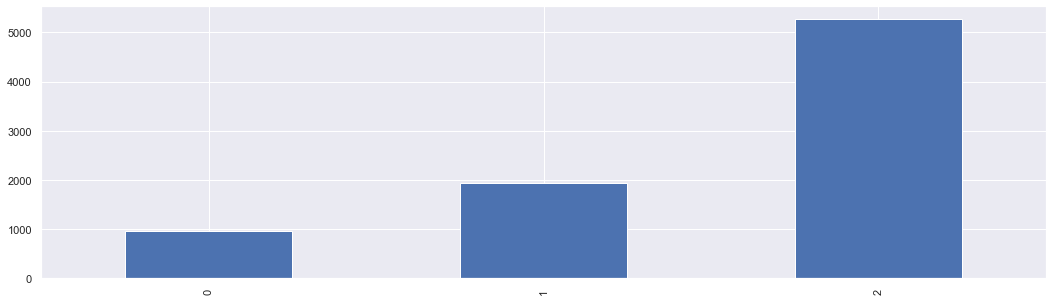

In [760]:
# 신용등급이 낮아서 직업유형이 없나? -> 원본 데이터프레임과 전체적 양상 차이 크지 않다. 아니다
crd[ crd['occyp_type'].isna() ]['credit'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

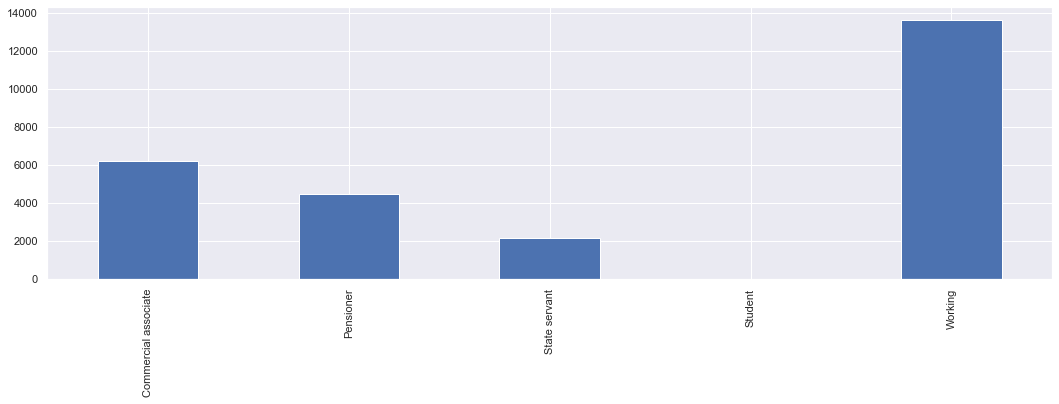

In [761]:
# 일용직이라 그런가?(1)
crd                            ['income_type'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

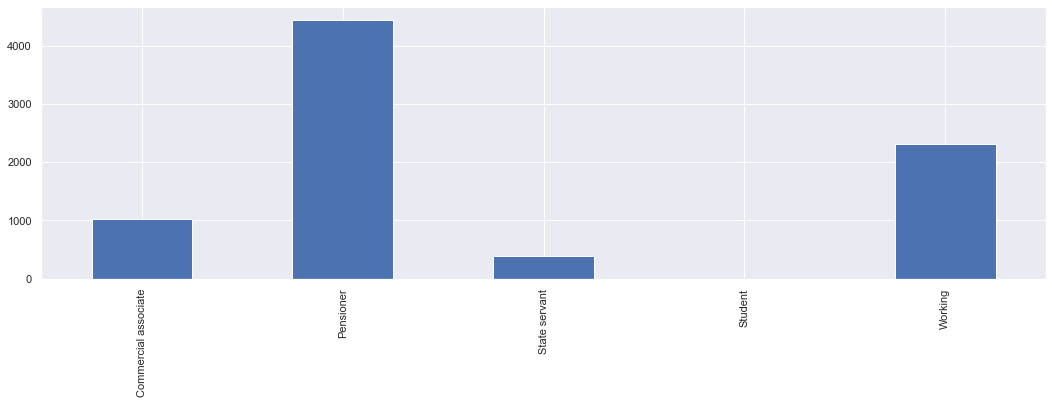

In [762]:
# 일용직이라 그런가?(2)  ---> Pensioner의 비율이 높다.
crd[ crd['occyp_type'].isna() ]['income_type'].value_counts().sort_index().plot(kind='bar')

In [763]:
# Pensioner의 직업 분포
crd[crd['income_type']=='Pensioner']['occyp_type'].value_counts()

Laborers          3
Core staff        2
Medicine staff    1
Drivers           1
Accountants       1
Managers          1
Name: occyp_type, dtype: int64

,index,child_num,income_total,days_birth,days_employed,flag_mobil,work_phone,phone,email,family_size,begin_month,credit,years_birth,years_employed,begin_years
count,4449.000000,4449.00000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,13298.999550,0.04855,149840.552933,-21753.195100,364335.752529,1.0,0.000899,0.287705,0.032592,1.741290,-25.889638,1.515397,59.597795,0.011498,2.157470
std,7565.651992,0.27709,77691.015342,1939.257142,18225.357478,0.0,0.029975,0.452744,0.177585,0.559263,16.766386,0.700590,5.313033,0.318145,1.397199
min,14.000000,0.00000,29250.000000,-25152.000000,-5521.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,22.315068,0.000000,0.000000
25%,6859.000000,0.00000,94500.000000,-23044.000000,365243.000000,1.0,0.000000,0.000000,0.000000,1.000000,-40.000000,1.000000,57.126027,0.000000,0.916667
50%,13348.000000,0.00000,135000.000000,-21942.000000,365243.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000,60.115068,0.000000,2.000000
75%,19710.000000,0.00000,180000.000000,-20851.000000,365243.000000,1.0,0.000000,1.000000,0.000000,2.000000,-11.000000,2.000000,63.134247,0.000000,3.333333
max,26443.000000,3.00000,742500.000000,-8145.000000,365243.000000,1.0,1.000000,1.000000,1.000000,5.000000,0.000000,2.000000,68.909589,15.126027,5.000000


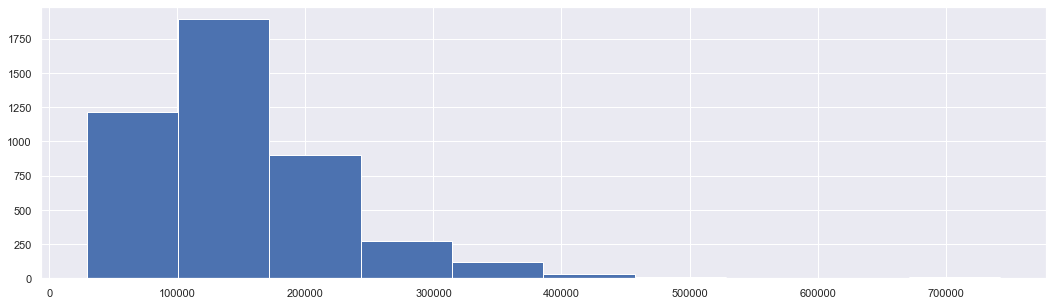

In [764]:
# Pnesioner의 소득 분포
plt.hist(crd[crd['income_type']=='Pensioner']['income_total'])
crd[crd['income_type']=='Pensioner'].describe()

<AxesSubplot:>

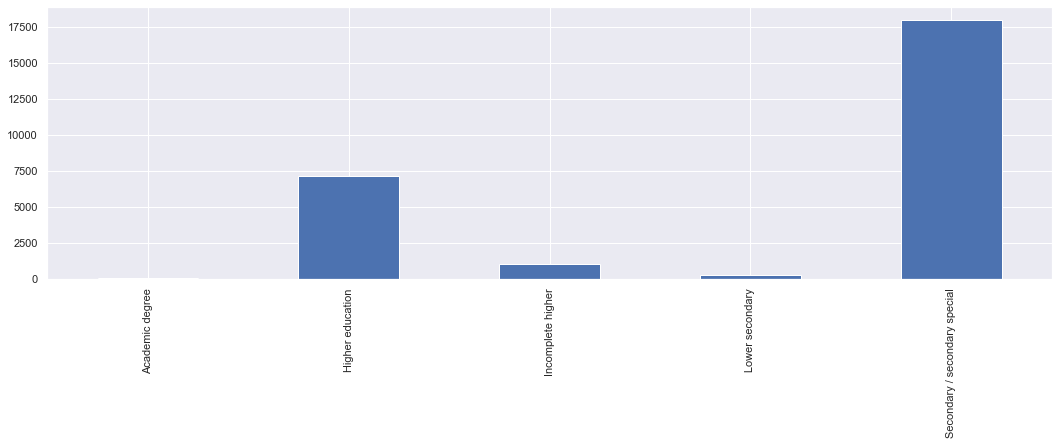

In [765]:
# 교육을 못 받았나?(1)
crd                          ['edu_type'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

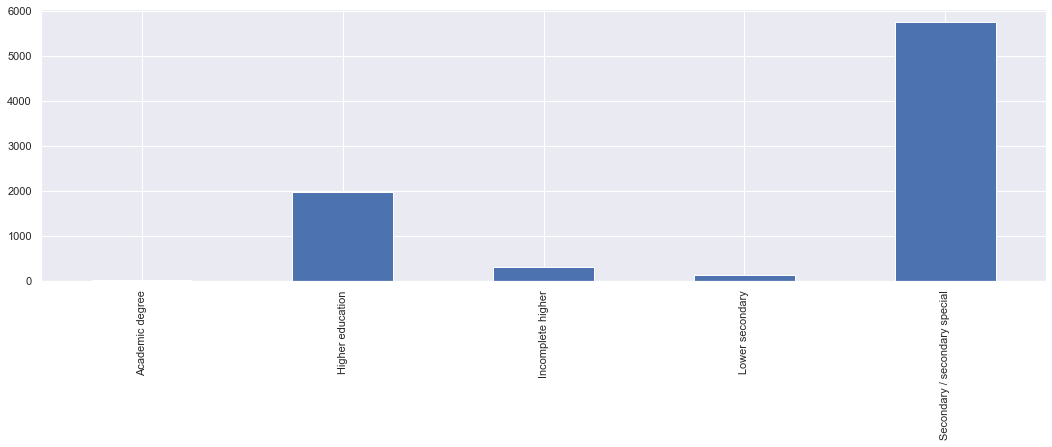

In [766]:
# 교육을 못 받았나?(2) ---> 별로 상관 없다.
crd[ crd['occyp_type'].isna() ]['edu_type'].value_counts().sort_index().plot(kind='bar')

In [767]:
# 쓸 데 없음

# temp0=crd.drop(['index', 'income_total', 'days_birth', 'days_employed', 'begin_month'], axis=1)
# temp=crd[crd['occyp_type'].isna() ].drop(['index', 'income_total', 'days_birth', 'days_employed', 'begin_month'], axis=1)
# print(temp0.nunique()) # occyp_type이 null이 아닌 것도 포함
# print(temp.nunique())  # occyp_type이 null인 것만
# for uni_col in temp.columns:
#     print(uni_col)
#     print(pd.unique(temp[uni_col]))
#     print('--'*30)

# # temp 데이터프레임 drop
# del(temp0)
# del(temp)

### 업무 방식별
<pre>
work_phone: 업무용 전화 소유 여부
email: 이메일 소유 여부

In [768]:
# 대체로 비슷한 양상을 보여 무의미
# sns.histplot(data=crd, x="occyp_type", hue="work_phone")

In [769]:
# 대체로 비슷한 양상을 보여 무의미
# sns.histplot(data=crd, x="occyp_type", hue="email")

### 직업 요건별
<pre>
edu_type: 교육 수준

<AxesSubplot:xlabel='occyp_type', ylabel='Count'>

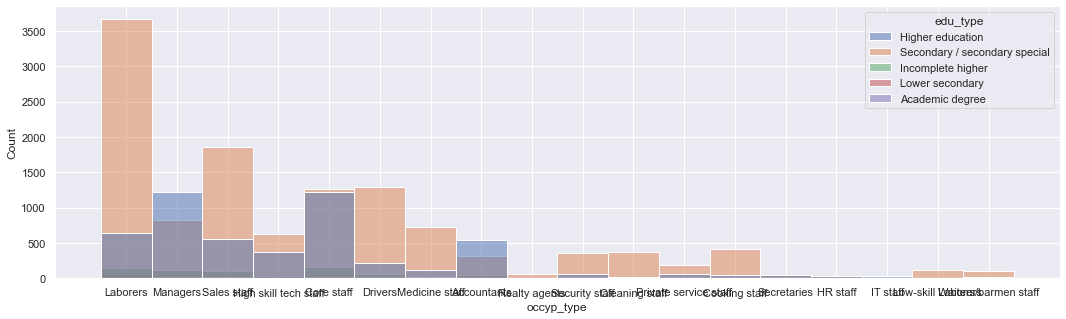

In [770]:
sns.histplot(data=crd, x="occyp_type", hue="edu_type")

### 직업 유형에 따른 결과
<pre>
house_type: 생활 방식
income_total: 연간 소득 -> 너무 연속적이라 제외
income_type: 소득 분류
car: 차량 소유 여부
reality: 부동산 소유 여부

In [771]:
# 거의 대부분이 아파트라 무의미
# sns.histplot(data=crd, x="occyp_type", hue="house_type")

<AxesSubplot:xlabel='occyp_type', ylabel='Count'>

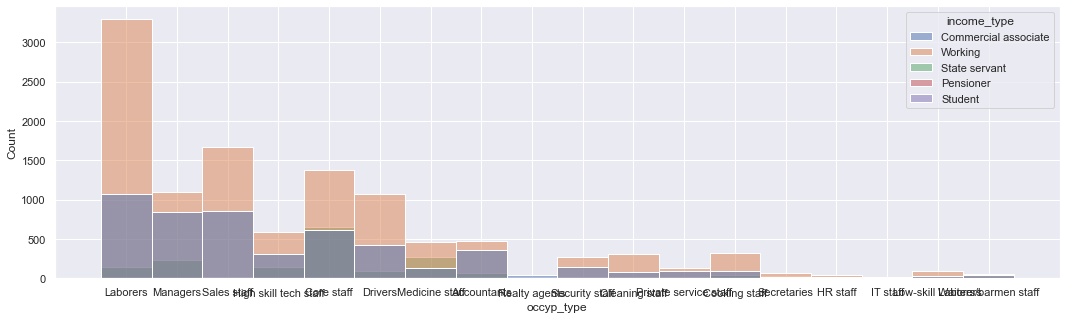

In [772]:
sns.histplot(data=crd, x="occyp_type", hue="income_type")

<AxesSubplot:xlabel='occyp_type', ylabel='Count'>

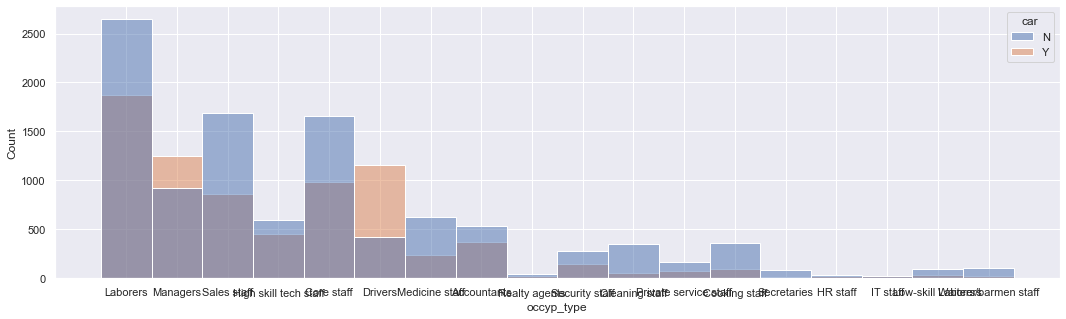

In [773]:
sns.histplot(data=crd, x="occyp_type", hue="car")

In [774]:
# 대체로 비슷한 양상을 보여 무의미
# sns.histplot(data=crd, x="occyp_type", hue="reality")

<pre>
---------------> Academic degree 면서 차가 있으면 Manager, 없으면 Sales staff
---------------> 나머지는 최빈값인 Labors

In [775]:
# crd2['occyp_type'][(crd2['edu_type']=='Academic degree')&(crd2['car']=='N')]

crd.loc[(crd['edu_type']=='Academic degree')&(crd['car']=='Y'), 'occyp_type']='Manager'
crd.loc[(crd['edu_type']=='Academic degree')&(crd['car']=='N'), 'occyp_type']='Sales staff'
crd.info()

# 원본 16  occyp_type     18286 non-null  object 
# ---> 16  occyp_type     18299 non-null  object 

# 하면 떨어짐 
# crd['occyp_type']=crd['occyp_type'].fillna(crd['occyp_type'].mode().values[0])

crd['occyp_type']=crd['occyp_type'].fillna('')


crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           26457 non-null  int64  
 1   gender          26457 non-null  object 
 2   car             26457 non-null  object 
 3   reality         26457 non-null  object 
 4   child_num       26457 non-null  int64  
 5   income_total    26457 non-null  float64
 6   income_type     26457 non-null  object 
 7   edu_type        26457 non-null  object 
 8   family_type     26457 non-null  object 
 9   house_type      26457 non-null  object 
 10  days_birth      26457 non-null  int64  
 11  days_employed   26457 non-null  int64  
 12  flag_mobil      26457 non-null  int64  
 13  work_phone      26457 non-null  int64  
 14  phone           26457 non-null  int64  
 15  email           26457 non-null  int64  
 16  occyp_type      18299 non-null  object 
 17  family_size     26457 non-null 

In [776]:
# 실패의 흔적들..

# crd['occyp_type']=crd.apply(lambda x : 'Drivers' if (x['edu_type']=='Secondary / secondary special') & (x['car']=='Y')&(x['occyp_type']==np.nan) else x['occyp_type'], axis=1)
# crd['occyp_type']=crd.apply(lambda x : 'Managers' if (x['edu_type']=='Higher education') & (x['car']=='Y')&(x['occyp_type']==np.nan) else x['occyp_type'], axis=1)

# crd.loc['occyp_type'][(crd['occyp_type'].isna()) & (x['edu_type']=='Secondary / secondary special') & (x['car']=='Y')]='Drivers'
# crd.loc['occyp_type'][(crd['occyp_type'].isna()) & (x['edu_type']=='Higher education') & (x['car']=='Y')]='Drivers'

# crd2=pd.read_csv('./dataset/train.csv', sep=',')
# pd.crosstab(crd2['occyp_type'],[ crd2['edu_type'], crd2['car']]) # Academic degree 면서 차가 있으면 Manager, 없으면 Sales staff

# crd2['occyp_type'][(crd2['edu_type']=='Academic degree')&(crd2['car']=='N')]

# crd2.loc[(crd2['edu_type']=='Academic degree')&(crd2['car']=='Y'), 'occyp_type']='Manager'
# crd2.loc[(crd2['edu_type']=='Academic degree')&(crd2['car']=='N'), 'occyp_type']='Sales staff'
# crd2.info()

In [777]:
# 실패의 흔적들..

# 1. Academic degree 면서 차가 있으면 Manager, 없으면 Sales staff
# 2. 

# crd2['occyp_type']=crd2.apply(lambda x : 'Drivers' if (x['edu_type']=='Academic degree') & (x['car']=='Y')&(x['occyp_type'].isnull()==True) else x['occyp_type'], axis=1)

# crd2['occyp_type22']=crd2['occyp_type'][(crd2['edu_type']=='Academic degree')&(crd2['car']=='Y')].fillna('Manager')
# crd2['occyp_type22']=crd2['occyp_type'][(crd2['edu_type']=='Academic degree')&(crd2['car']=='N')].fillna('Sales staff')

# crd2['occyp_type']=crd2.apply(lambda x : 'Drivers' if (x['edu_type']=='Secondary / secondary special') & (x['car']=='Y')&(x['occyp_type']==np.nan) else x['occyp_type'], axis=1)
# crd2['occyp_type']=crd2.apply(lambda x : 'Managers' if (x['edu_type']=='Higher education') & (x['car']=='Y')&(x['occyp_type']==np.nan) else x['occyp_type'], axis=1)

# crd2.info()

# crd.loc['occyp_type'][(crd['occyp_type'].isna()) & (x['edu_type']=='Secondary / secondary special') & (x['car']=='Y')]='Drivers'
# crd.loc['occyp_type'][(crd['occyp_type'].isna()) & (x['edu_type']=='Higher education') & (x['car']=='Y')]='Drivers'



* ---> 다음에는 fillna로 nan value는 missingmissing이나 999999999으로 대충 없는 값 넣은 다음에 조건 붙여야겠다.

# object 처리
-> 여러 값 가진 애 중에 너무 범위 넓으면 one hot(get dummy 형으로)

In [778]:
col_list=crd.select_dtypes(include='object').columns.tolist()
crd[col_list].describe()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,26457
unique,2,2,2,5,5,5,6,20
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,
freq,17697,16410,17830,13645,17995,18196,23653,8158


In [779]:
# 전체 dataFrame으로 가져온 다음 columns 지정해주면 자동 concat
# get_dummies 를 이용해 unique 값이 두 개인 column 더미변수화(다중공선성 문제 피하기 위해 drop_first=True로 설정)
# get_dummies는 마지막에!!!

crd=pd.get_dummies(crd,prefix=['gender', 'car', 'reality','occyp_type'], prefix_sep="_", columns=['gender', 'car', 'reality','occyp_type'],  drop_first=True)
crd.head()


,index,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,...,occyp_type_Low-skill Laborers,occyp_type_Manager,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,...,0,0,1,0,0,0,0,0,0,0
3,3,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,...,0,0,1,0,0,0,0,0,0,0


In [780]:
col_list=['income_type',	'edu_type',	'family_type',	'house_type']
for col in col_list:
    crd[col]=crd[col].astype('category').cat.codes 

crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             26457 non-null  int64  
 1   child_num                         26457 non-null  int64  
 2   income_total                      26457 non-null  float64
 3   income_type                       26457 non-null  int8   
 4   edu_type                          26457 non-null  int8   
 5   family_type                       26457 non-null  int8   
 6   house_type                        26457 non-null  int8   
 7   days_birth                        26457 non-null  int64  
 8   days_employed                     26457 non-null  int64  
 9   flag_mobil                        26457 non-null  int64  
 10  work_phone                        26457 non-null  int64  
 11  phone                             26457 non-null  int64  
 12  emai

In [781]:
crd.head()

,index,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,...,occyp_type_Low-skill Laborers,occyp_type_Manager,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,202500.0,0,1,1,2,-13899,-4709,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,247500.0,0,4,0,1,-11380,-1540,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,450000.0,4,1,1,1,-19087,-4434,1,...,0,0,1,0,0,0,0,0,0,0
3,3,0,202500.0,0,4,1,1,-15088,-2092,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,157500.0,2,1,1,1,-15037,-2105,1,...,0,0,1,0,0,0,0,0,0,0


# 본격적 가공(++ 다른 사람들 방식)

In [782]:
# 피쳐 중요도 높은 애부터 가공하자!!!

In [783]:
crd.columns

Index(['index', 'child_num', 'income_total', 'income_type', 'edu_type',
       'family_type', 'house_type', 'days_birth', 'days_employed',
       'flag_mobil', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit', 'years_birth', 'years_employed', 'begin_years',
       'gender_M', 'car_Y', 'reality_Y', 'occyp_type_Accountants',
       'occyp_type_Cleaning staff', 'occyp_type_Cooking staff',
       'occyp_type_Core staff', 'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Manager', 'occyp_type_Managers',
       'occyp_type_Medicine staff', 'occyp_type_Private service staff',
       'occyp_type_Realty agents', 'occyp_type_Sales staff',
       'occyp_type_Secretaries', 'occyp_type_Security staff',
       'occyp_type_Waiters/barmen staff'],
      dtype='object')

## rate 구하기

In [784]:
# 자율 분석

## 날짜 관련 가공

### 업무 중인가 아닌가

In [785]:
crd['days_employed'][crd['days_employed']>0].unique()

array([365243], dtype=int64)

In [786]:
crd['hire_yn']=crd['days_employed'].apply(lambda x : 0 if x>=0 else 1)
crd['hire_yn'].describe()

count    26457.000000
mean         0.832256
std          0.373646
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: hire_yn, dtype: float64

In [787]:
crd.loc[crd['days_employed']>=0,'hire_yn2']=0
crd.loc[crd['days_employed']<0,'hire_yn2']=1

crd['hire_yn2'].describe()

crd.head(2)

,index,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,...,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,hire_yn,hire_yn2
0,0,0,202500.0,0,1,1,2,-13899,-4709,1,...,0,0,0,0,0,0,0,0,1,1.0
1,1,1,247500.0,0,4,0,1,-11380,-1540,1,...,0,0,0,0,0,0,0,0,1,1.0


In [788]:
pd.crosstab(crd['hire_yn'], crd['hire_yn2'])

hire_yn2,0.0,1.0
hire_yn,,
0,4438,0
1,0,22019


### 날짜 연 단위로 변환

In [789]:
# -1 곱해주기 (나는 해서 생략)

In [790]:
# 날짜 연습 ^^

# 이렇게 하는 게 제일 정확하다!!!! -> 캘린더 기준으로 하기 때문

import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY # 날짜 더하기 빼기 간단하게 하는 게 rrule

now = dt.datetime.now()          # 오늘 날짜
dt.timedelta(days=-1)            # 기준 날짜,시각 기점으로 n일/초/분/주 델타값을 지정. (- 하면 이전 +는 이후)

old=now-dt.timedelta(days=365)

rrule(freq=YEARLY, dtstart=old, until=now) # 그냥 하면 객체로 나온다.

print([y for y in rrule(freq=YEARLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 연 별로 뭐뭐 있나?(본인 포함)

print([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 주 별로 뭐뭐 있나?(본인 포함)

print( len ([y for y in rrule(freq=YEARLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 년 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

print( len ([y for y in rrule(freq=MONTHLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 개월 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

print( len ([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)]) )

[datetime.datetime(2021, 1, 19, 18, 2, 7), datetime.datetime(2022, 1, 19, 18, 2, 7)]
[datetime.datetime(2021, 1, 19, 18, 2, 7), datetime.datetime(2021, 1, 26, 18, 2, 7), datetime.datetime(2021, 2, 2, 18, 2, 7), datetime.datetime(2021, 2, 9, 18, 2, 7), datetime.datetime(2021, 2, 16, 18, 2, 7), datetime.datetime(2021, 2, 23, 18, 2, 7), datetime.datetime(2021, 3, 2, 18, 2, 7), datetime.datetime(2021, 3, 9, 18, 2, 7), datetime.datetime(2021, 3, 16, 18, 2, 7), datetime.datetime(2021, 3, 23, 18, 2, 7), datetime.datetime(2021, 3, 30, 18, 2, 7), datetime.datetime(2021, 4, 6, 18, 2, 7), datetime.datetime(2021, 4, 13, 18, 2, 7), datetime.datetime(2021, 4, 20, 18, 2, 7), datetime.datetime(2021, 4, 27, 18, 2, 7), datetime.datetime(2021, 5, 4, 18, 2, 7), datetime.datetime(2021, 5, 11, 18, 2, 7), datetime.datetime(2021, 5, 18, 18, 2, 7), datetime.datetime(2021, 5, 25, 18, 2, 7), datetime.datetime(2021, 6, 1, 18, 2, 7), datetime.datetime(2021, 6, 8, 18, 2, 7), datetime.datetime(2021, 6, 15, 18, 2, 7)

* map 가로로만 반영(축 안 줘도 됨) / apply 는 전체로 받아와서 축 받아와야 됨

<font color=red size=3> <B>**** 강사님 코드 가져오기 -> 전체로 하면 연산 못 하니까 일부만 해서 받아와라

In [791]:
# import datetime as dt
# from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# def my_convert_ymw(day) :
#     now = dt.datetime.now()
#     old = now - dt.timedelta(days=day)
#     y= len([y for y in rrule(freq=YEARLY ,dtstart=old , until=now)])  -1
#     m = len([y for y in rrule(freq=MONTHLY ,dtstart=old , until=now)]) -1
#     w = len([y for y in rrule(freq=WEEKLY  ,dtstart=old , until=now)]) -1
#     return y,m,w

# train2 = train.iloc[:50].copy()
# #my_convert_ymw(13899) 
# train2[['DAY_BIRTH_Y','DAY_BIRTH_M','DAY_BIRTH_W']] = train2.apply(lambda x : my_convert_ymw(x['DAYS_BIRTH']*-1), 
#                                        axis=1, result_type="expand")                                            # result_type="expand" 하면 결과값 여러개로 받아올 수 있다.(반환 받을 것도 열 개로 지정)
# train2.head()


In [792]:
crd['year_employed2']=(crd['days_employed']*-1)/(12*30)
crd['year_birth2']=crd['days_birth']*(-1)/(12*30)
crd['begin_year2']=crd['begin_month']*(-1)/12

# 연수 주수 월수 확인(강사님 코드)

crd.drop(['year_employed2', 'year_birth2', 'begin_year2'], axis=1)

,index,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,...,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,hire_yn,hire_yn2
0,0,0,202500.0,0,1,1,2,-13899,-4709,1,...,0,0,0,0,0,0,0,0,1,1.0
1,1,1,247500.0,0,4,0,1,-11380,-1540,1,...,0,0,0,0,0,0,0,0,1,1.0
2,2,0,450000.0,4,1,1,1,-19087,-4434,1,...,1,0,0,0,0,0,0,0,1,1.0
3,3,0,202500.0,0,4,1,1,-15088,-2092,1,...,0,0,0,0,1,0,0,0,1,1.0
4,4,0,157500.0,2,1,1,1,-15037,-2105,1,...,1,0,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,2,225000.0,2,4,1,1,-12079,-1984,1,...,0,0,0,0,0,0,0,0,1,1.0
26453,26453,1,180000.0,4,1,2,1,-15291,-2475,1,...,0,0,0,0,0,0,0,0,1,1.0
26454,26454,0,292500.0,4,4,0,5,-10082,-2015,1,...,0,0,0,0,0,0,0,0,1,1.0
26455,26455,0,171000.0,4,2,3,1,-10145,-107,1,...,0,0,0,0,0,0,0,0,1,1.0


## log scaling : income_total
* 지나치게 큰 수치형은 log 변환해서 스케일 줄임
* 오버플로우 방지
* 언더플로우 방지하려면 +1 해줘야됨 -> 귀찮으면 log1p 쓰면 자동으로 처리해준다.(연산할 때는 1 더해서 하고 보여줄 때는 빼서 보여준다. 근데 야악간 소수점 밑으로 달라진다)

In [793]:
np.log(10000) # 자연로그

np.log10(10000) # 상용로그(밑이 10)

np.log1p(10000) # log1p 

9.210440366976517

In [794]:
crd['income_total']=np.log1p(crd['income_total']) # array 라 가능한가봐
crd['income_total'].head()

0    12.218500
1    12.419170
2    13.017005
3    12.218500
4    11.967187
Name: income_total, dtype: float64

### 재산 변수 만들기 -> car+ reality==재산

In [795]:
# 파생변수 만들기 연습^^
crd['car_reality']=crd['car_Y']+crd['reality_Y']

In [820]:
# 아웃라이어 없애기

drop_idx = crd[crd['child_num']>=14][['child_num','family_size']].index
print(drop_idx)
crd = crd.drop( drop_idx , axis=0)


# 애 하난데 가족 한 명, 애 둘인데 가족 한 명 어떻게 하지??
# test set에 만약 얘네 데이터 많으면 함부로 drop하면 망할 수도 -> drop 할 때는 test에 있는 data 확인해야...

Int64Index([], dtype='int64')


count    26453.000000
mean         0.426417
std          0.724327
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: child_num, dtype: float64

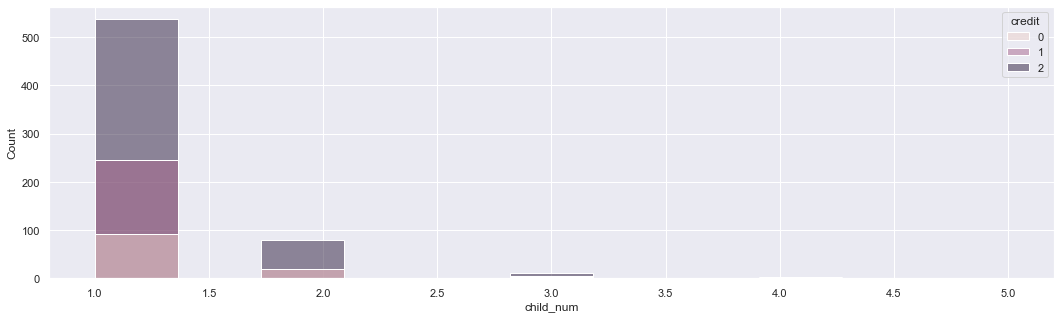

In [819]:

crd.loc[(crd['family_size']-crd['child_num'])==1, 'credit']

sns.histplot(data=crd.loc[(crd['family_size']-crd['child_num'])==1&(crd['family_size']!=1) , :], x="child_num", hue="credit")  # &(crd['family_size']!=1) 혼자 사는 사람 빼기

crd['child_num'].describe()

In [814]:
### 황지현님 코드
pd.crosstab(crd.loc[(crd['family_size']-crd['child_num']==1) &(crd['family_size']!=1) ,'credit'],  crd.loc[crd['family_size']-crd['child_num']==1 ,'child_num'])

child_num,1,2,3,4,5
credit,,,,,
0,92,20,3,1,0
1,245,20,5,0,0
2,532,80,11,3,1


In [816]:
### 황지현님 코드
crd.loc[crd['child_num']==0 ,'credit'].value_counts()/crd.shape[0]

2    0.445507
1    0.163384
0    0.084414
Name: credit, dtype: float64

In [818]:
### 황지현님 코드
crd.loc[crd['child_num']>0 ,'credit'].value_counts()/crd.shape[0]

2    0.195781
1    0.073527
0    0.037387
Name: credit, dtype: float64

# 서로 관련된 변수 확인+결합하기
family size, child
reality, house_type

<AxesSubplot:xlabel='house_type', ylabel='Count'>

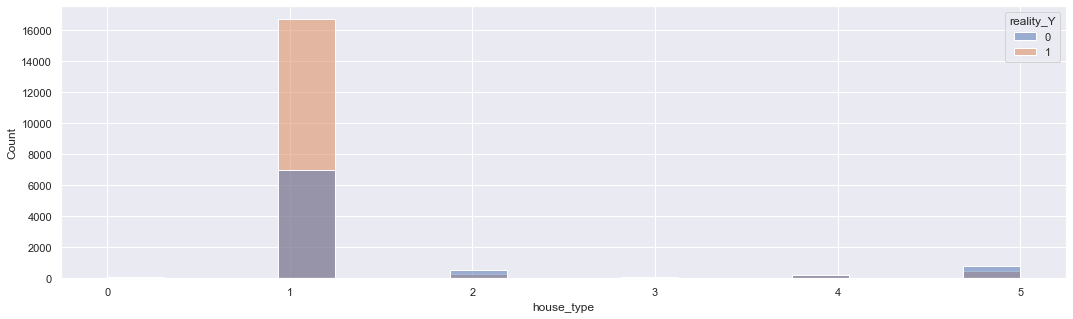

In [527]:
# reality와 house_type은 큰 상관 보이지 않음.
sns.histplot(data=crd, x="house_type", hue="reality_Y")

# 불필요한 column drop

In [596]:
# index -> unique한 value라 drop
# flag_mobil -> 모든 값이 동일하여 drop
# days_birth, days_employed, begin_month -> years 변수 만들어서 drop
# family_size child_num이랑 상관관계 너무 높아서 drop


# crd=crd.drop(['index','flag_mobil', 'days_birth', 'days_employed', 'begin_month','family_size'], axis=1)

crd=crd.drop(['car_Y','reality_Y'], axis=1)

crd.head()

,index,child_num,income_total,income_type,edu_type,family_type,house_type,days_birth,days_employed,flag_mobil,...,occyp_type_Low-skill Laborers,occyp_type_Manager,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,202500.0,0,1,1,2,-13899,-4709,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,247500.0,0,4,0,1,-11380,-1540,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,450000.0,4,1,1,1,-19087,-4434,1,...,0,0,1,0,0,0,0,0,0,0
3,3,0,202500.0,0,4,1,1,-15088,-2092,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,157500.0,2,1,1,1,-15037,-2105,1,...,0,0,1,0,0,0,0,0,0,0


# test data, train data 나누기

-> 함수로 처리

# 데이터 분석

-> 함수로 처리

In [531]:
my_fit_score(crd)

RandomForestClassifier 		 정확도:0.7014
LogisticRegression 		 정확도:0.6404


c:\ai\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<font size=3>1차 점수 --- 날짜 처리(나는 안 한 거나 다름 없다)</font>
<pre>
RandomForestClassifier 		 정확도:0.7088
LogisticRegression 		 정확도:0.6402
</pre>
---
<font size=3>2차 점수 --- 파생변수</font>
<pre>
RandomForestClassifier 		 정확도:0.7014
LogisticRegression 		 정확도:0.6404

<font size=5>기존 내 점수</font>

<font size=3>1차 점수 --- 결측 처리, object 처리, 불필요한 column drop</font>
<pre>
RandomForestClassifier정확도 : 0.711262
LogisticRegression정확도 : 0.636243
KNeighborsClassifier정확도 : 0.545163
DecisionTreeClassifier정확도 : 0.609221
LinearSVC정확도 : 0.605631
</pre>
---
<font size=3>2차 점수 --- occyp_type academic degree+car 기준으로 바꿈</font>
<pre>
RandomForestClassifier정확도 : 0.710317
LogisticRegression정확도 : 0.636243
KNeighborsClassifier정확도 : 0.545163
DecisionTreeClassifier정확도 : 0.609788
LinearSVC정확도 : 0.273810
</pre>
---
<font size=3>3차 점수 --- date, month를 year 기준으로 바꾸고 양수 처리, 이상치(date_employed) 0으로 제거, family drop</font>
<pre>
RandomForestClassifier정확도 : 0.713908
LogisticRegression정확도 : 0.636243
KNeighborsClassifier정확도 : 0.545163
DecisionTreeClassifier정확도 : 0.608844
</pre>
---
<font size=3>4차 점수 --- occyp_type 최빈값으로 바꿈(점수 하락으로 취소)</font>
<pre>
RandomForestClassifier정확도 : 0.709940
LogisticRegression정확도 : 0.636243
KNeighborsClassifier정확도 : 0.545163
DecisionTreeClassifier정확도 : 0.609410
LinearSVC정확도 : 0.225246
</pre>
---
<font size=3>5차 점수 --- occyp_type get_dummies</font>
<pre>
RandomForestClassifier정확도 : 0.714853
LogisticRegression정확도 : 0.636243
KNeighborsClassifier정확도 : 0.545163
DecisionTreeClassifier정확도 : 0.605631
LinearSVC정확도 : 0.267196